# Initial Visualizations
Before plugging everything into a machine learning algorithm, it is necessary to conduct an exploratory data analysis to get a better background on the data.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
train_df = pd.read_csv('data/fraudTrain.csv')
test_df = pd.read_csv('data/fraudTest.csv')

In [3]:
train_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

It is seen above that both the training data and testing data have no NA's. 

In [5]:
# Change categorical variable to binary.
train_df["is_fraud"] = train_df.is_fraud.apply(lambda x: "T" if x ==1 else "F")
test_df["is_fraud"] = test_df.is_fraud.apply(lambda x: "T" if x ==1 else "F")

In [6]:
# Drop the first column which represents only indicies.
train_df.drop('Unnamed: 0', axis=1, inplace=True)

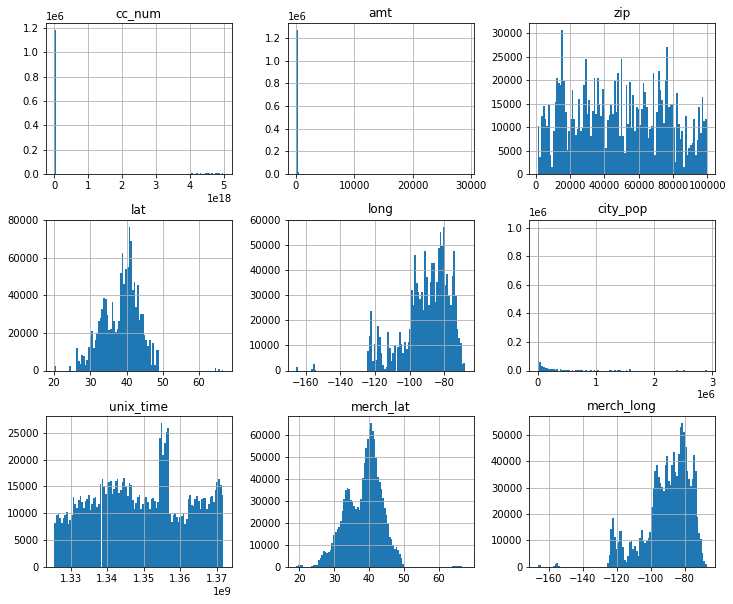

In [7]:
# Visualizat each quantitative variable. 
train_df.hist(bins=100, figsize=(12,10))
plt.show()

In [8]:
# Obtain a correlation matrix
train_corr = train_df.corr()

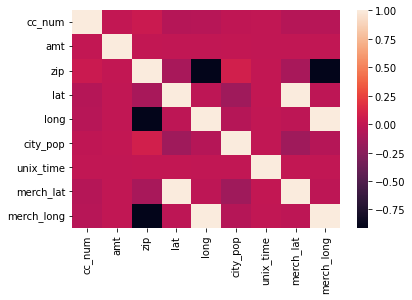

In [9]:
# Visualize the correlation matrix as a heatmap.
sns.heatmap(train_corr)
plt.show()

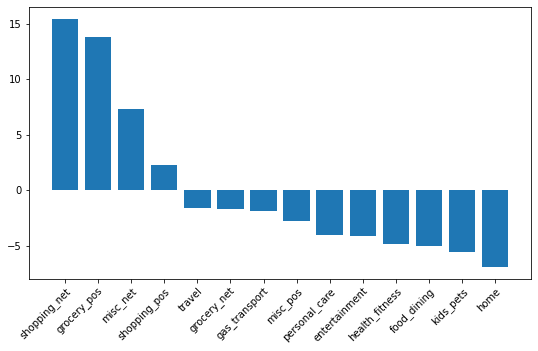

In [22]:
x = train_df[train_df['is_fraud']== 'T']['category']
y = train_df[train_df['is_fraud']== 'F']['category']


a1 = x.value_counts(normalize=True)
a2 = y.value_counts(normalize=True)
z = (a1 - a2)*100
z = z.sort_values(ascending=False)

cat = z.index
freq = z.values
positions = range(len(cat))

plt.figure(figsize=(9,5))
plt.bar(positions, freq  )
plt.xticks(positions,cat, rotation=45, ha="right",rotation_mode='anchor', wrap=True)


plt.show()

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

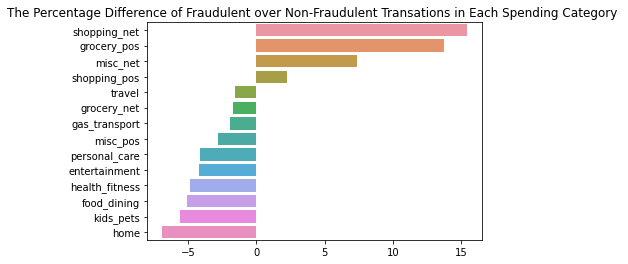

In [24]:
ax = sns.barplot(y=cat, x = freq)

plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')